## Imports

In [1]:
import os
import urllib.request
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

import warnings
warnings.filterwarnings("ignore")

## Clean the data and annotations

In [2]:
car_damages_path = 'car_damages.csv'
car_damages_cleaned_path = 'car_damages_cleaned.csv'

car_damages = pd.read_csv(car_damages_path)
car_damages.columns = ['listing_url', 'year', 'make', 'model', 'damage', 'est_value', 'full_label', 'image1_url', 'image2_url', 'image3_url', 'image4_url']

def get_id(row):
    url = row['listing_url']
    listing_id = url[-8:]
    return listing_id

def retail_value(row):
    est_value = row['est_value']
    return int(''.join(filter(str.isdigit, est_value)))
    
car_damages['listing_id'] = car_damages.apply(lambda row: get_id(row), axis=1)
car_damages = car_damages[['listing_id', 'year', 'make', 'model', 'damage', 'est_value', 'full_label', 'listing_url', 'image1_url', 'image2_url', 'image3_url', 'image4_url']]

car_damages = car_damages.dropna()
car_damages = car_damages[car_damages.est_value.str.contains("USD")]
car_damages['est_value'] = car_damages.apply(lambda row: retail_value(row), axis=1)

car_damages.to_csv(car_damages_cleaned_path, index=False)

In [3]:
car_damages.head()

,listing_id,year,make,model,damage,est_value,full_label,listing_url,image1_url,image2_url,image3_url,image4_url
0,23885009,2010,ACURA,MDX,FRONT END,12726,2010 ACURA MDX,https://www.copart.com/lot/23885009,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...
1,24487306,2002,ACURA,3.2 CL,FRONT END,1984,2002 ACURA 3.2CL,https://www.copart.com/lot/24487306,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...
2,25667019,2012,ACURA,TL,FRONT END,13095,2012 ACURA TL,https://www.copart.com/lot/25667019,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...
3,25717579,2005,ACURA,TL,VANDALISM,4275,2005 ACURA TL,https://www.copart.com/lot/25717579,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...
6,25887480,2008,ACURA,MDX TECHNO,FRONT END,7742,2008 ACURA MDX TECHNOLOGY,https://www.copart.com/lot/25887480,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...,https://cs.copart.com/v1/AUTH_svc.pdoc00001/PI...


## Visualize the data

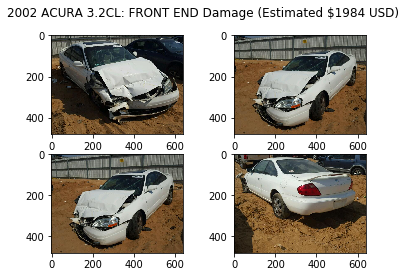

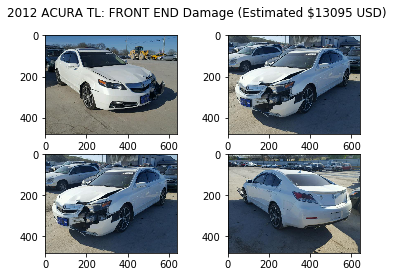

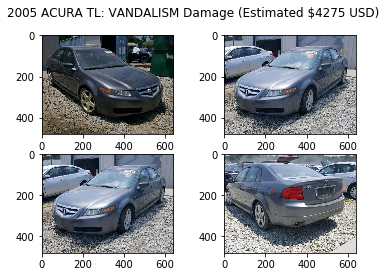

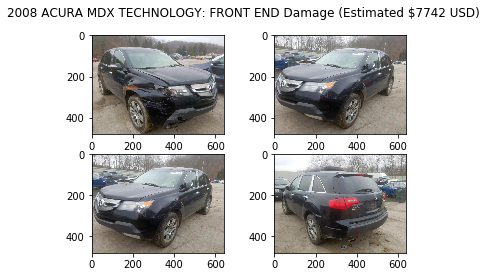

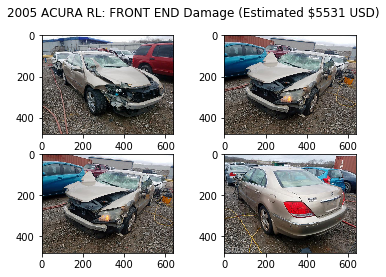

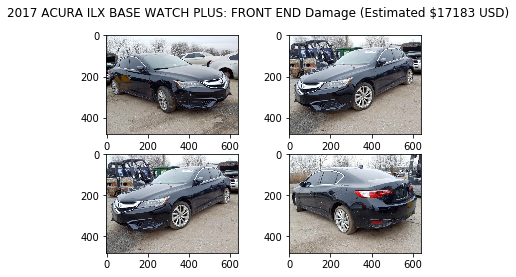

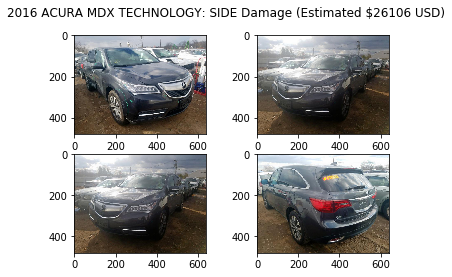

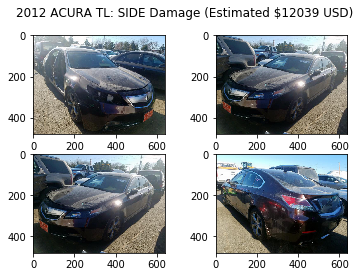

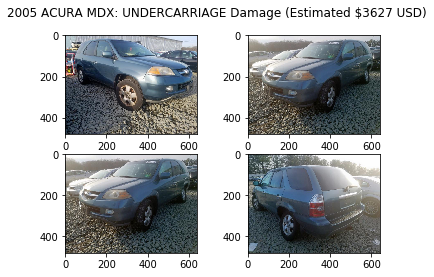

In [5]:
data_path = './data_damages/'

for idx in range(1,10):
    test = car_damages.iloc[idx]
    test_id = test['listing_id']
    label = test['full_label']
    damage = test['damage']
    est_value = test['est_value']

    fig, axs = plt.subplots(2, 2)
    for i in range(0, 2):
        for j in range(1, 3):
            img_name = os.path.join(data_path, '{}-{}.jpg'.format(test_id, i+j))
            image = Image.open(img_name)
            axs[i, j-1].imshow(image)

    fig.suptitle("{}: {} Damage (Estimated ${} USD)".format(label, damage, est_value))
    plt.savefig("damages_example_{}.png".format(idx))
        